In [39]:
import numpy as np
import matplotlib.pyplot as plt
 
 
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)

X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(np.square(X1) + np.square(X2))

cm = plt.cm.get_cmap('viridis')
# plt.scatter(X1, X2, c=Y, cmap=cm)


# cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
# plt.clabel(cp, inline=1, fontsize=10)
# cp = plt.contourf(X1, X2, Y, )
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

# levels = [0.0, 1.0, 2.0, 4.0, 8.0, 12.0, 14.0]
# cp = plt.contour(X1, X2, Y, levels, colors='black', linestyles='dashed', linewidths=1)
# plt.clabel(cp, inline=1, fontsize=10)
# cp = plt.contourf(X1, X2, Y, levels)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()
Y.shape

(100, 100)

In [42]:
levels = np.sort(np.array(errors))

(13,)

Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Gradient Descent has converged
w = [3.91359776 2.77964408]


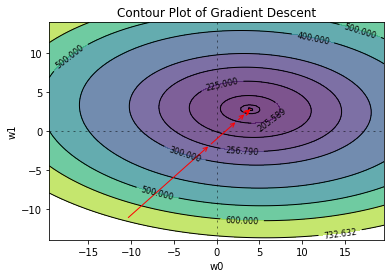

In [28]:
import pandas as pd
 
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
y = data['sales']
X = np.column_stack((data['TV'], data['radio']))
 
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3
 
old_w = []
errors = []

# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

all_ws = np.array(old_w)
 
# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)
 
levels = np.sort(np.array(errors))

w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))


for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

# Cost Function Visualizations

### Load and prepare the data

In [1]:
import numpy as np
import pandas as pd

Lets load the dataset unto our workspace with Pandas:

In [2]:
df = pd.read_csv('weatherww2.csv')
df = df[['MinTemp', 'MaxTemp']]
df.head(10)

<ipython-input-2-d4332d17fec9>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherww2.csv')


,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
5,21.666667,26.666667
6,22.777778,28.333333
7,22.222222,26.666667
8,22.777778,27.222222
9,21.666667,25.555556


This is a pretty straightforward and simple linear regression task

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

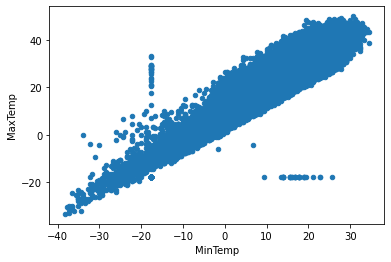

In [3]:
df.plot.scatter('MinTemp', 'MaxTemp')

### Setting up the visualizations
Let's visualize for this data how the cost function will look like for the MSE loss for different parameters and models
<img src="https://i.ibb.co/LYB4Yx0/mse.png" alt="mse" width="600"/>

In [4]:
# define the vectorized MSE cost function 
def mse_cost(predictions, target):
    N = predictions.shape[0]
    diff = predictions.ravel() - target.ravel()
    cost = np.dot(diff, diff.T) / N
    return cost

In [5]:
# define the prediction for a simple linear model
def LinearModel(thetas, X):
    # normalize add bias term
    X = (X - X.mean()) / X.std()
    X = np.hstack((X, np.ones((X.shape[0], 1), dtype=X.dtype)))
    return np.dot(X, thetas)

In [6]:
# initialize data structures
vis_df = df.sample(frac=0.1)
y = vis_df.iloc[:, 1].to_numpy().reshape(-1, 1)
X = vis_df.iloc[:, 0].to_numpy().reshape(-1, 1)

In [7]:
# grid search over "all" possible theta values and compute cost
start, end, step = -200, 200, 5
thetas_0, thetas_1 = np.arange(start, end, step), np.arange(start, end, step)

# loop over the all the parameter pairs and create a list of all possible pairs
thetas_lst = []
for theta_0 in thetas_0:
    for theta_1 in thetas_1:
        thetas_lst.append(np.array([theta_0, theta_1]).reshape(-1, 1))

linear_cost_lst = []       
for thetas in thetas_lst:
    # get prediction from our model
    pred_linear = LinearModel(thetas, X)
    # keep track of the cast per parameter pairs
    linear_cost_lst.append(mse_cost(pred_linear, y))

### Linear Model Cost Function Visualization

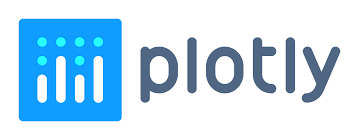
<br>
An open-source, interactive graphing library for Python

In [8]:
# arrange the costs back to a square matrix grid
axis_length = len(np.arange(start, end, step))
linear_cost_matrix = np.array(linear_cost_lst).reshape(axis_length, axis_length)

In [9]:
import plotly.graph_objects as go

# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=linear_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)

fig.show()

### Neural Net Model Cost Function Visualization

In [ ]:
# define the predictions function for the mini-network
def MiniNet(thetas, X):
    z1 = X * thetas[0]
    a1 = np.tanh(z1)
    z2 = a1 * thetas[1]
    return z2

Behold! The all Powerful MiniNet ~
![MiniNet](https://i.ibb.co/0tC7gLQ/MiniNet.png)

In [ ]:
# repeat the process for the NN

nn_cost_lst = []       
for thetas in thetas_lst:
    # get prediction from our model
    pred_nn = MiniNet(thetas, X)
    # keep track of the cast per parameter pairs
    nn_cost_lst.append(mse_cost(pred_nn, y))

In [ ]:
# arrange the costs back to a square matrix grid
nn_cost_matrix = np.array(nn_cost_lst).reshape(axis_length, axis_length)

In [148]:
# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=nn_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='MiniNet Model MSE Cost Surface',
                  width=700, height=700)

fig.show()